## 선형회귀

### K-최근접 이웃 회귀 문제점

- 기본데이터: http://bit.ly/perch_data

In [1]:
import numpy as np

In [2]:
# 농어[Perch]
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
perch_length.shape

(56,)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- 분류는 입력이 (길이, 무게) 쌍. 타겟이(도미, 빙어)
- 회귀는 입력이 길이, 타겟이 무게, 길이에 따른 무게를 예측

In [7]:
# 훈련세트, 테스트세트 분리
# X_train, y_train, X_target, y_target 와 같이 많이 사용
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [9]:
# 값 입력시 2차원 배열이 되어야하기 때문에 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [10]:
# K-최근접 이웃회귀
from sklearn.neighbors import KNeighborsRegressor

In [11]:
knr = KNeighborsRegressor(n_neighbors=3)
knr

KNeighborsRegressor(n_neighbors=3)

In [12]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [28]:
knr.predict([[50,]])    # 80으로 해도 1033.3333 도출

array([1033.33333333])

- 농어 길이가 50cm가 되면 무게는 1033.3g 예측됨
- 실제 농어의 무게는 더 많이 나감

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [ ]:
# 50cm 농어 최근접 이웃 구하기
pred_perch = [[50,]]
distances, indexes = knr.kneighbors(pred_perch)

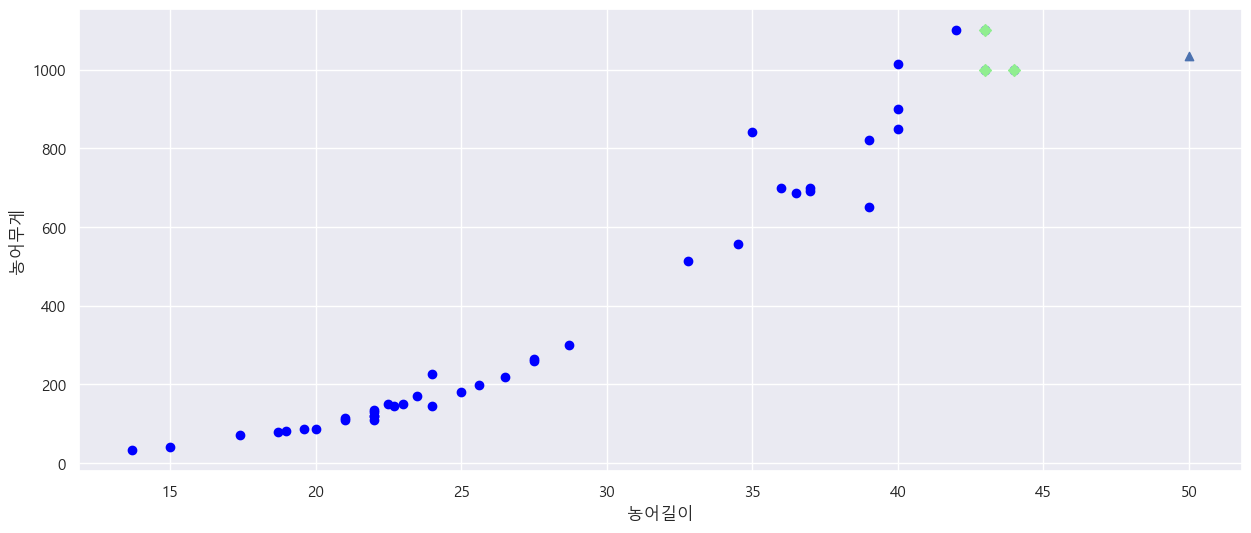

In [25]:
# 농어훈련세트 산점도 그리기
plt.figure(figsize=(15, 6))
plt.scatter(train_input, train_target, color='blue', label='농어데이터')
# 훈련세트에서 최근접 이웃만 다시 표시
plt.scatter(train_input[indexes], train_target[indexes], marker='D', color='lightgreen', label='이웃데이터')
plt.scatter(50.0, 1033.3333, marker='^')

plt.xlabel('농어길이')
plt.ylabel('농어무게')
plt.show()

### 선형회귀
- 대표적인 회귀 알고리즘. 직선을 학습하는 알고리즘
- 간단하고 성능이 뛰어남

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr

LinearRegression()

In [32]:
# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [34]:
lr.score(test_input, test_target)

0.824750312331356

In [35]:
lr.predict([[50,]])

array([1241.83860323])

- 50cm 농어는 1242.9g 정도 무게라고 예측됨

In [36]:
# 선형회귀 직선 방정식 확인
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


In [41]:
lr.coef_    # 기울기, 가중치(weight)

array([39.01714496])

In [40]:
lr.intercept_   # 절편

-709.0186449535474

- 농어무게 = aX + b
- a(기울기) -> 39.01714496
- b(절편) -> -709.018644

In [42]:
(39.01714496 * 50.0) +(-709.0186449535474)

1241.8386030464528

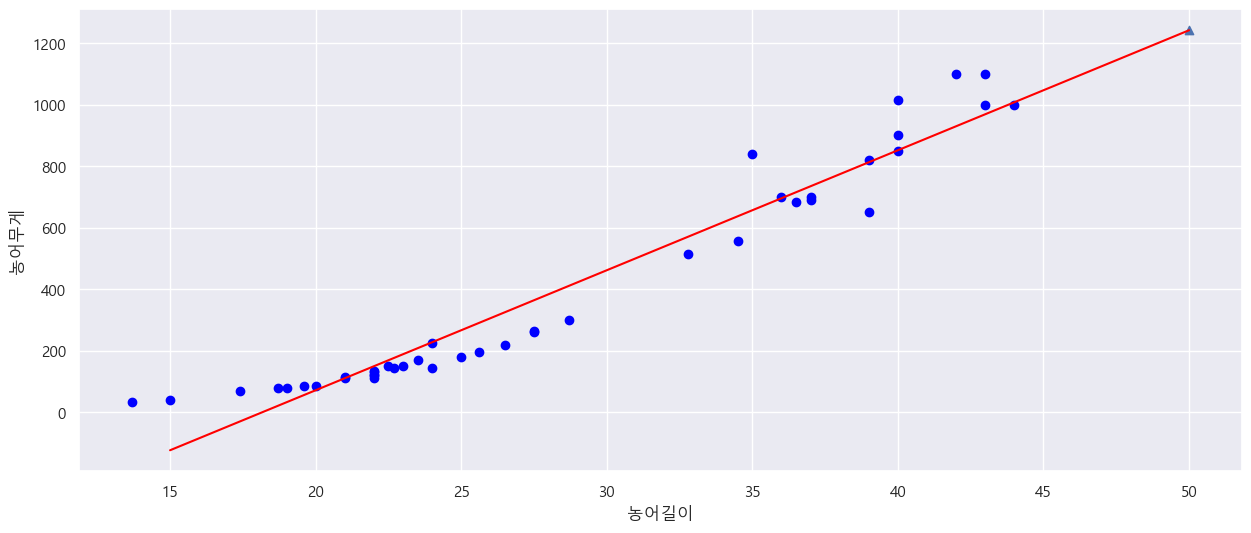

In [45]:
plt.figure(figsize=(15, 6))
plt.scatter(train_input, train_target, color='blue', label='농어데이터')
# 선형 회귀 직선 그리기
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='red')
plt.scatter(50.0, 1241.8386, marker='^')

plt.xlabel('농어길이')
plt.ylabel('농어무게')
plt.show()

In [46]:
lr.score(train_input, train_target)

0.9398463339976041

In [47]:
lr.score(test_input, test_target)

0.824750312331356

In [48]:
lr.predict([[10, ]])

array([-318.84719532])